# Postprocessing Semi-Boosted

In [1]:
import os
from HH4b import utils, plotting, postprocessing
from HH4b.postprocessing import Region, weight_shifts
from HH4b.utils import ShapeVar, CUT_MAX_VAL
from HH4b.hh_vars import samples, data_key, bg_keys, sig_keys, LUMI

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

from copy import deepcopy

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [3]:
MAIN_DIR = "../../../"
# almost there but jets were not selected with eta<2.5
# path_to_dir = f"{MAIN_DIR}/../data/matching/23Nov13_WSel_v9_private/"
path_to_dir = f"{MAIN_DIR}/../data/matching/23Nov17_v9_private/"
year = "2018"

# make plot and template directory
date = "23Nov17"
plot_dir = f"{MAIN_DIR}/plots/PostProcessing/{date}/{year}"
template_dir = f"templates/{date}/"
_ = os.system(f"mkdir -p {plot_dir}")
_ = os.system(f"mkdir -p {template_dir}/cutflows/{year}")

from HH4b.hh_vars import samples

samples = deepcopy(samples[year])
sample_dirs = {path_to_dir: samples}

In [4]:
sample_dirs

{'../../..//../data/matching/23Nov17_v9_private/': {'hh4b': ['GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8'],
  'qcd': ['QCD_HT-1000to1500-13TeV',
   'QCD_HT-1500to2000-13TeV',
   'QCD_HT-2000toInf-13TeV',
   'QCD_HT-200to300-13TeV',
   'QCD_HT-300to500-13TeV',
   'QCD_HT-500to700-13TeV',
   'QCD_HT-700to1000-13TeV'],
  'data': ['Run2018A', 'Run2018B', 'Run2018C', 'Run2018D'],
  'ttbar': ['TTTo2L2Nu_13TeV', 'TTToHadronic_13TeV', 'TTToSemiLeptonic_13TeV'],
  'vjets': ['WJetsToQQ_HT-200to400_13TeV',
   'WJetsToQQ_HT-400to600_13TeV',
   'WJetsToQQ_HT-600to800_13TeV',
   'WJetsToQQ_HT-800toInf_13TeV',
   'ZJetsToQQ_HT-200to400_13TeV',
   'ZJetsToQQ_HT-400to600_13TeV',
   'ZJetsToQQ_HT-600to800_13TeV',
   'ZJetsToQQ_HT-800toInf_13TeV'],
  'diboson': ['ZZTo4B01j_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8'],
  'gghtobb': ['GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8'],
  'vbfhtobb': ['VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8'],
  'vhtobb': ['WminusH

In [ ]:
df = pd.read_parquet(
    "../../../../data/matching/23Nov17_v9_private/2018/GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/parquet"
)
list(df.columns)

In [5]:
filters = [
    # one good fatjet (fatjet with index 0 has the largest Xbb score)
    ("('ak8FatJetPt', '0')", ">=", 300),
    ("('ak8FatJetPNetMass', '0')", ">=", 60),
    # ("('ak8FatJetPNetXbb', '0')", ">=", 0.9734),  # medium WP
    # second fatjet has lower Xbb score
    ("('ak8FatJetPNetXbb', '1')", "<", 0.9880),  # tight WP
    # ("('ak8FatJetPNetXbb', '1')", "<", 0.9734),  # medium WP
    # ("('ak8FatJetPNetXbb', '1')", "<", 0.9172), # loose WP
]

# save cutflow as pandas table
cutflow = pd.DataFrame(index=list(samples.keys()))

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in sample_dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(
            input_dir,
            samples,
            year,
            filters=filters,
        ),
    }

utils.add_to_cutflow(events_dict, "Preselection", "weight", cutflow)
print("\n", cutflow)

Loading GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8
Loading QCD_HT-200to300-13TeV
Loading QCD_HT-1000to1500-13TeV
Loading QCD_HT-500to700-13TeV
Loading QCD_HT-700to1000-13TeV
Loading QCD_HT-300to500-13TeV
Loading QCD_HT-1500to2000-13TeV
Loading QCD_HT-2000toInf-13TeV
Loading Run2018A
Loading Run2018C
Loading Run2018D
Loading Run2018B
Loading TTToHadronic_13TeV
Loading TTToSemiLeptonic_13TeV
Loading TTTo2L2Nu_13TeV
Loading ZJetsToQQ_HT-400to600_13TeV
Loading WJetsToQQ_HT-600to800_13TeV
Loading WJetsToQQ_HT-800toInf_13TeV
Loading WJetsToQQ_HT-200to400_13TeV
Loading ZJetsToQQ_HT-200to400_13TeV
Loading ZJetsToQQ_HT-800toInf_13TeV
Loading ZJetsToQQ_HT-600to800_13TeV
Loading WJetsToQQ_HT-400to600_13TeV
Loading ZZTo4B01j_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8
Loading GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8
Loading VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8
Loading WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8
Loading ZH_HToBB_ZToQQ_M-

In [6]:
for key, events in events_dict.items():
    print(key, len(events))

hh4b 23079
qcd 80216
data 700921
ttbar 1507736
vjets 94582
diboson 120257
gghtobb 2330
vbfhtobb 2283
vhtobb 39773
tthtobb 356881


## Discriminator variables

In [7]:
import vector


def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "PNetMass" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [8]:
events.ak4JetOutsidebtagPNetProbb

,0,1,2,3,4,5
0,0.868961,0.136897,0.006412,0.019220,0.008519,0.011070
1,0.997958,0.851707,0.335207,0.226030,0.010050,0.007742
2,0.997223,0.331353,0.030989,0.015780,0.009923,-99999.000000
3,0.998655,0.247733,0.002831,0.000000,0.003105,0.004740
4,0.997986,0.961903,0.023145,0.006817,0.022713,0.009239
...,...,...,...,...,...,...
356876,0.925364,0.782766,0.009691,0.007181,0.001209,0.001047
356877,0.943353,0.173436,0.295634,0.370368,0.025789,0.023295
356878,0.942156,0.286837,0.011574,0.003299,-99999.000000,-99999.000000
356879,0.886543,0.053071,0.098375,0.037029,0.014498,0.018832


In [10]:
# Particle Net AK4 2018 WPs (and 2017)
# j.pt > 25 and abs(j.eta) < 2.4 and (j.jetId & 4)
# apply jet puId only for CHS jets
# veto jet from looseleptons
jetTagWPs = {
    54: "(pn_b_plus_c>0.5) & (pn_b_vs_c>0.99)",
    53: "(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.99) & (pn_b_vs_c>0.96)",
    52: "(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.96) & (pn_b_vs_c>0.88)",
    51: "(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.88) & (pn_b_vs_c>0.70)",
    50: "(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.70) & (pn_b_vs_c>0.40)",
    # 44: '(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.05)',
    # 43: '(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.15) & (pn_b_vs_c>0.05)',
    # 42: '(pn_b_plus_c>0.5) & (pn_b_vs_c<=0.40) & (pn_b_vs_c>0.15)',
    # 41: '(pn_b_plus_c<=0.5) & (pn_b_plus_c>0.2)',
    # 40: '(pn_b_plus_c<=0.2) & (pn_b_plus_c>0.1)',
    # 0: '(pn_b_plus_c<=0.1)',
}

for key in events_dict.keys():
    events = events_dict[key]

    pnet_b = events.ak4JetOutsidebtagPNetProbb
    pnet_bb = events.ak4JetOutsidebtagPNetProbbb
    pnet_c = events.ak4JetOutsidebtagPNetProbc
    pnet_cc = events.ak4JetOutsidebtagPNetProbcc
    pnet_uds = events.ak4JetOutsidebtagPNetProbuds
    pnet_g = events.ak4JetOutsidebtagPNetProbg

    pn_b = (pnet_b + pnet_bb) / (pnet_c + pnet_cc + pnet_uds + pnet_g)
    pn_c = (pnet_c + pnet_cc) / (pnet_b + pnet_bb + pnet_uds + pnet_g)
    # pn_uds = (pnet_uds) / (pnet_b + pnet_bb + pnet_c + pnet_cc + pnet_g)
    # pn_g = (pnet_g) / (pnet_b + pnet_bb + pnet_c + pnet_cc + pnet_uds)

    pn_b_plus_c = pn_b + pn_c
    pn_b_vs_c = pn_b / pn_b_plus_c

    j = {
        "pn_b_plus_c": pn_b_plus_c,
        "pn_b_vs_c": pn_b_vs_c,
    }
    pn_sel = {}
    for wp, expr in jetTagWPs.items():
        pn_sel[wp] = eval(expr, j)

    nbjets_pnet_ak4 = pn_sel[54] + pn_sel[53] + pn_sel[52] + pn_sel[51] + pn_sel[50]
    nbjets_pnet_ak4 = np.sum(nbjets_pnet_ak4, axis=1)
    events_dict[key]["nbjets_pnet_ak4"] = nbjets_pnet_ak4

In [11]:
events_dict["hh4b"]["nbjets_pnet_ak4"]

0        4
1        5
2        4
3        5
4        4
        ..
23074    1
23075    4
23076    3
23077    3
23078    5
Name: nbjets_pnet_ak4, Length: 23079, dtype: int64

In [12]:
hep.style.use(["CMS", "firamath"])

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

import hist
from matplotlib.lines import Line2D
from HH4b.plotting import color_by_sample

color_by_sample["qcd"] = "orange"

hr_pt_axis = hist.axis.Regular(40, 0, 1000, name="pt", label=r"Higgs resolved $p_T$ [GeV]")
hr_eta_axis = hist.axis.Regular(40, -2.5, 2.5, name="eta", label=r"Higgs resolved $\eta$")
hr_mass_axis = hist.axis.Regular(40, 0, 300, name="mass", label=r"Higgs resolved mass [GeV]")

j3_pt_axis = hist.axis.Regular(40, 0, 1000, name="pt", label=r"$J_3$ (resolved) $p_T$ [GeV]")
j4_pt_axis = hist.axis.Regular(40, 0, 1000, name="pt", label=r"$J_4$ (resolved) $p_T$ [GeV]")
j3_btag_axis = hist.axis.Regular(40, 0, 1, name="btag", label=r"$J_3$ (resolved) DeepFlavB")
j4_btag_axis = hist.axis.Regular(40, 0, 1, name="btag", label=r"$J_4$ (resolved) DeepFlavB")
j_dr_axis = hist.axis.Regular(40, 0, 4, name="dr", label=r"$\Delta$ R($J_4, J_3$) (resolved)")
j_pt_ratio_axis = hist.axis.Regular(40, 0, 4, name="ptratio", label=r"$J_3/J_4$ $p_T$ [GeV]")

hb_pt_axis = hist.axis.Regular(40, 250, 1000, name="pt", label=r"Higgs boosted $p_T$ [GeV]")
hb_eta_axis = hist.axis.Regular(40, -2.5, 2.5, name="eta", label=r"Higgs boosted $\eta$")
hb_mass_axis = hist.axis.Regular(40, 0, 300, name="mass", label=r"Higgs boosted PNet mass [GeV]")
hb_btag_axis = hist.axis.Regular(40, 0.97, 1, name="btag", label=r"Higgs boosted PNetXbb")

fj2_pt_axis = hist.axis.Regular(40, 250, 1000, name="pt", label=r"FatJet 2 $p_T$ [GeV]")
fj2_eta_axis = hist.axis.Regular(40, -2.5, 2.5, name="eta", label=r"FatJet 2 $\eta$")
fj2_mass_axis = hist.axis.Regular(40, 0, 300, name="mass", label=r"FatJet 2 PNet mass [GeV]")
fj2_btag_axis = hist.axis.Regular(80, 0, 1, name="btag", label=r"FatJet 2 PNetXbb")

hh_pt_axis = hist.axis.Regular(40, 0, 1000, name="pt", label=r"HH $p_T$ [GeV]")
hh_eta_axis = hist.axis.Regular(40, -2.5, 2.5, name="eta", label=r"HH $\eta$")
hh_mass_axis = hist.axis.Regular(40, 250, 2000, name="mass", label=r"HH mass [GeV]")

dR_axis = hist.axis.Regular(40, 0, 4, name="dr", label=r"$\Delta R(H_b,H_r)$")
dphi_axis = hist.axis.Regular(40, -3.2, 3.2, name="dphi", label=r"$\Delta \phi(H_b,H_r)$")
deta_axis = hist.axis.Regular(40, -3.2, 3.2, name="deta", label=r"$\Delta \eta(H_b,H_r)$")

njets_axis = hist.axis.Regular(7, 1, 8, name="njets", label="Number of outside jets")
nfatjets_axis = hist.axis.Regular(4, 1, 5, name="nfatjets", label="Number of fat jets")
nbjets_axis = hist.axis.Regular(
    7, 1, 8, name="nbjets", label="Number of outside jets (PNetAK4 B0-B4)"
)
nbjetsDM_axis = hist.axis.Regular(
    7, 1, 8, name="nbjets", label="Number of outside jets (DeepJet M)"
)
nbjetsDT_axis = hist.axis.Regular(
    7, 1, 8, name="nbjets", label="Number of outside jets (DeepJet T)"
)

cat_axis = hist.axis.StrCategory([], name="Sample", growth=True)

In [13]:
hists = {
    "j3_pt": hist.Hist(j3_pt_axis, cat_axis),
    "j4_pt": hist.Hist(j4_pt_axis, cat_axis),
    "j3_j4_dr": hist.Hist(j_dr_axis, cat_axis),
    "j3_btag": hist.Hist(j3_btag_axis, cat_axis),
    "j4_btag": hist.Hist(j4_btag_axis, cat_axis),
    "j4_j4_ratio": hist.Hist(j_pt_ratio_axis, cat_axis),
    "hr_pt": hist.Hist(hr_pt_axis, cat_axis),
    "hr_eta": hist.Hist(hr_eta_axis, cat_axis),
    "hr_mass": hist.Hist(hr_mass_axis, cat_axis),
    "hb_pt": hist.Hist(hb_pt_axis, cat_axis),
    "hb_eta": hist.Hist(hb_eta_axis, cat_axis),
    "hb_mass": hist.Hist(hb_mass_axis, cat_axis),
    "hb_btag": hist.Hist(hb_btag_axis, cat_axis),
    "fj2_pt": hist.Hist(fj2_pt_axis, cat_axis),
    "fj2_eta": hist.Hist(fj2_eta_axis, cat_axis),
    "fj2_mass": hist.Hist(fj2_mass_axis, cat_axis),
    "fj2_btag": hist.Hist(fj2_btag_axis, cat_axis),
    "hh_pt": hist.Hist(hh_pt_axis, cat_axis),
    "hh_eta": hist.Hist(hh_eta_axis, cat_axis),
    "hh_mass": hist.Hist(hh_mass_axis, cat_axis),
    "dr": hist.Hist(dR_axis, cat_axis),
    "dphi": hist.Hist(dphi_axis, cat_axis),
    "deta": hist.Hist(deta_axis, cat_axis),
    "njets": hist.Hist(njets_axis, cat_axis),
    "nfatjets": hist.Hist(nfatjets_axis, cat_axis),
    "nbjets": hist.Hist(nbjets_axis, cat_axis),
    "nbjetsDM": hist.Hist(nbjetsDM_axis, cat_axis),
    "nbjetsDT": hist.Hist(nbjetsDT_axis, cat_axis),
}

selection_btags = {}
for key in events_dict.keys():
    events = events_dict[key]

    # jets outside the fatjet - sorted by b-score
    # also, abs(eta) < 2.5
    jets_outside = make_vector(events, "ak4JetOutside")
    # fatjets sorted by xbb
    fatjets = make_vector(events, "ak8FatJet")

    # H1 candidate
    h1 = fatjets[:, 0]
    # H1 b-b tagging
    h1_xbb = events.ak8FatJetPNetXbb[0]

    # H2 candidate
    # ak4 jet (outside) with highest b-tagging score (btagDeepFlavB)
    # btagDeepFlavB: b tagging for one AK4 jet
    j3 = jets_outside[:, 0]
    j4 = jets_outside[:, 1]
    j3_btag = events.ak4JetOutsidebtagDeepFlavB[0]
    j4_btag = events.ak4JetOutsidebtagDeepFlavB[1]
    h2 = j3 + j4

    # HH candidate
    hh = h2 + h1

    njets = events.nOutsideJets.to_numpy().squeeze()
    nfatjets = events.nFatJets.to_numpy().squeeze()

    # Second fatjet
    fj2 = fatjets[:, 1]
    fj2_xbb = events.ak8FatJetPNetXbb[1]

    events_dict[key]["hh_mass"] = hh.mass
    events_dict[key]["hr_mass"] = h2.mass

    # deepBFlavB
    # Tight 0.7100
    # Medium 0.2783
    nbjets_deepjet_medium = np.sum(events.ak4JetOutsidebtagDeepFlavB >= 0.2783, axis=1)
    nbjets_deepjet_tight = np.sum(events.ak4JetOutsidebtagDeepFlavB >= 0.7100, axis=1)

    selection_btags[key] = events.nbjets_pnet_ak4 >= 2

    vars = {
        "j3_pt": j3.pt,
        "j4_pt": j4.pt,
        "j3_btag": j3_btag,
        "j4_btag": j4_btag,
        "j3_j4_dr": j3.deltaR(j4),
        "j4_j4_ratio": j3.pt / j4.pt,
        "hb_pt": h1.pt,
        "hb_eta": h1.eta,
        "hb_mass": h1.mass,
        "hb_btag": h1_xbb,  # PN Score of H1
        "hr_pt": h2.pt,
        "hr_eta": h2.eta,
        "hr_mass": h2.mass,
        "hh_pt": hh.pt,
        "hh_eta": hh.eta,
        "hh_mass": hh.mass,
        "fj2_pt": fj2.pt,
        "fj2_eta": fj2.eta,
        "fj2_mass": fj2.mass,
        "fj2_btag": fj2_xbb,
        "dr": h1.deltaR(h2),
        "dphi": h1.deltaphi(h2),
        "deta": h1.deltaeta(h2),
        "njets": njets,
        "nfatjets": nfatjets,
        "nbjets": events.nbjets_pnet_ak4,
        "nbjetsDM": nbjets_deepjet_medium,
        "nbjetsDT": nbjets_deepjet_tight,
    }

    for var in hists.keys():
        hists[var].fill(vars[var], key)

In [ ]:
hists["hh_mass"]

In [ ]:
sample_keys = ["ttbar", "qcd", "hh4b", "vhtobb", "gghtobb"]
linestyles = {
    "hh4b": "solid",
    "ttbar": "dashed",
    "qcd": "dotted",
    "vhtobb": "dashdot",
    "gghtobb": "solid",
}


sel_dir = "FatJet2NoTight"
# sel_dir = "FatJet2NoMedium"
# sel_dir = "FatJet2NoLoose"

_ = os.system(f"mkdir -p {plot_dir}/{sel_dir}")

for var in hists.keys():
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    legend_elements = []
    for key in sample_keys:
        hep.histplot(
            hists[var][{"Sample": key}],
            density=True,
            lw=2,
            ls=linestyles[key],
            color=color_by_sample[key],
        )
        legend_elements.append(
            Line2D([0], [0], color=color_by_sample[key], lw=2, label=key, ls=linestyles[key])
        )

    ax.legend(handles=legend_elements)
    ax.set_ylabel("Density")
    fig.savefig(f"{plot_dir}/{sel_dir}/{var}.png")
    plt.close()

In [ ]:
selection_btags

## Control Plots

In [ ]:
ylims = {
    "2018": 5e5,
}
color_by_sample["qcd"] = "#FFE51F"

# {var: (bins, label)}
control_plot_vars = [
    # var must match key in events dictionary (i.e. as saved in parquet file)
    ShapeVar(var="ak8FatJetPt0", label=r"$p_T^{j1}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetPt1", label=r"$p_T^{j2}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(
        var="ak8FatJetPNetMass0",
        label=r"$m_{reg}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetPNetMass1",
        label=r"$m_{reg}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd0",
        label=r"$m_{SD}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd1",
        label=r"$m_{SD}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetPNetXbb0",
        label=r"$T_{Xbb}^{j1}$",
        bins=[50, 0.97, 1],
    ),
    ShapeVar(
        var="ak8FatJetPNetXbb1",
        label=r"$T_{Xbb}^{j2}$",
        bins=[50, 0.0, 1],
    ),
    ShapeVar(
        var="ht",
        label=r"HT (GeV)",
        bins=[50, 0, 4000],
    ),
    ShapeVar(
        var="hh_mass",
        label=r"MHH (GeV)",
        bins=[50, 250, 1200],
    ),
    ShapeVar(
        var="hr_mass",
        label=r"H resolved mass (GeV)",
        bins=[50, 50, 250],
    ),
]

hists = {}
for shape_var in control_plot_vars:
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key="weight",
            selection=selection_btags,
        )

for shape_var in control_plot_vars:
    name = f"{plot_dir}/{shape_var.var}.pdf"
    plotting.ratioHistPlot(
        hists[shape_var.var],
        year,
        ["hh4b"],
        bg_keys,
        name=name,
        show=True,
        log=True,
        plot_significance=False,
        significance_dir=shape_var.significance_dir,
        ratio_ylims=[0.2, 1.8],
        ylim=ylims[year],
        energy="13",
    )
    # break

## Cut-based selection

In [ ]:
CUT_MAX_VAL

pass


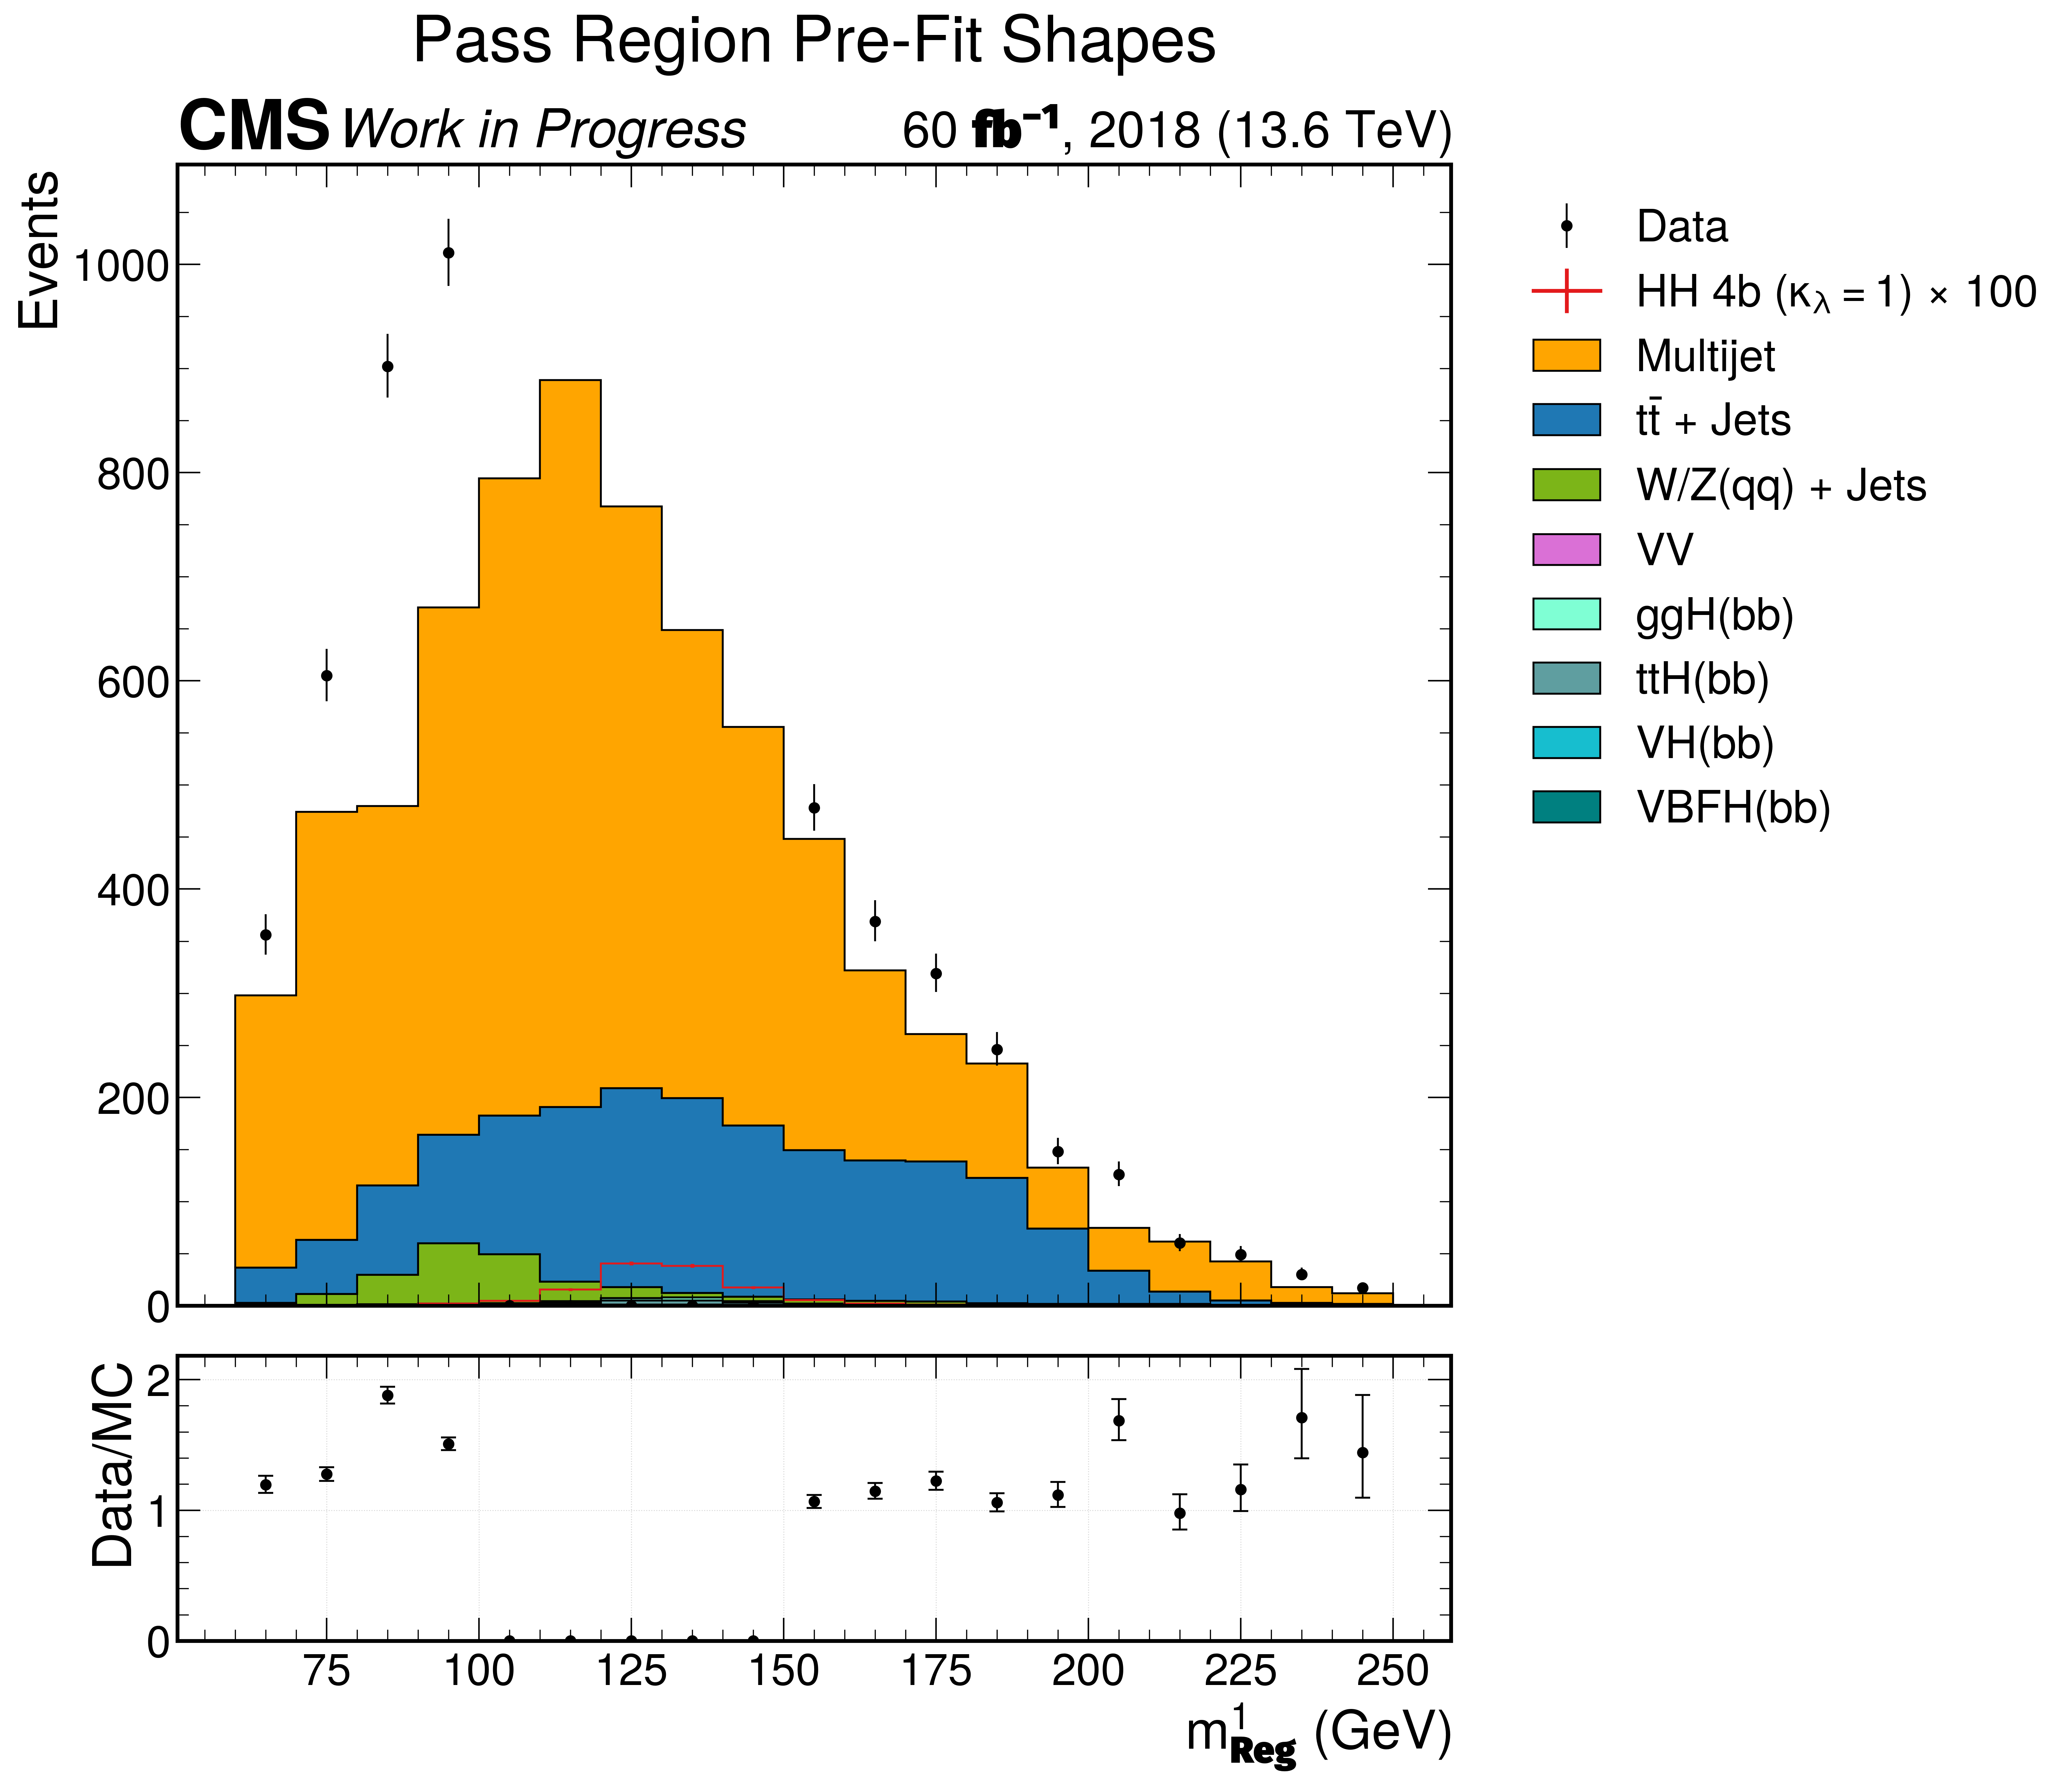

fail


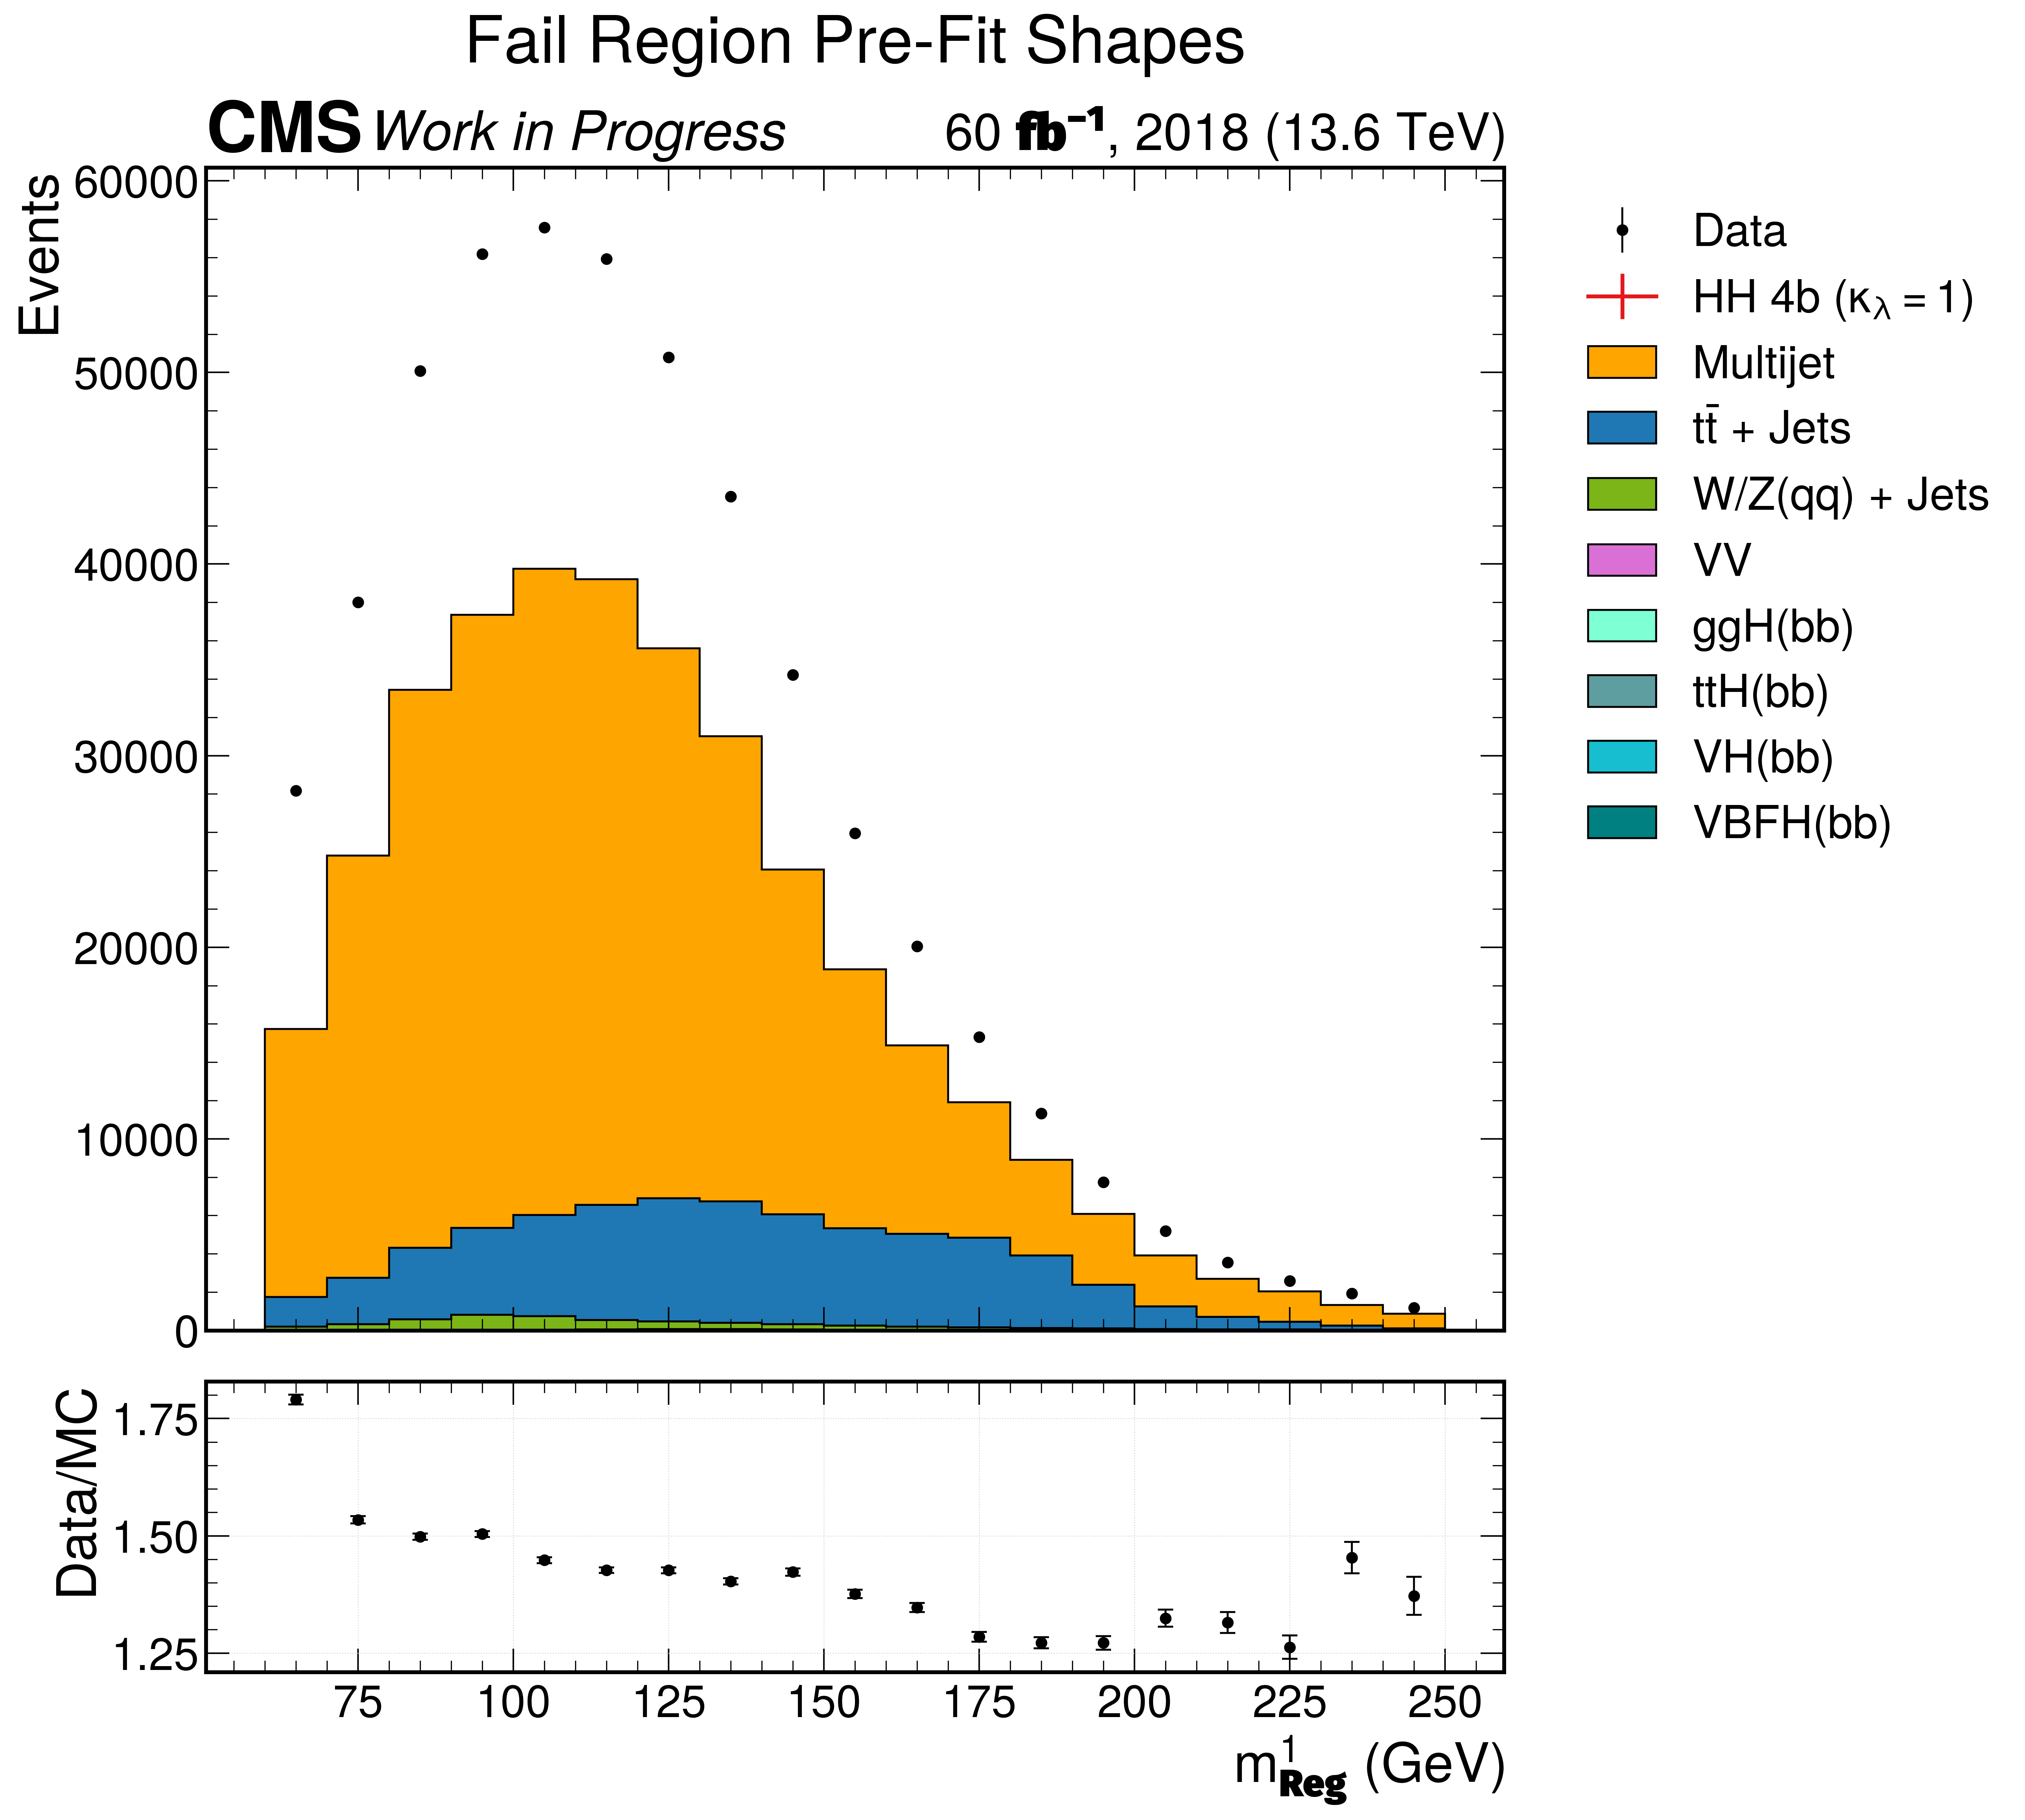

In [20]:
# {label: {cutvar: [min, max], ...}, ...}
selection_regions = {
    "pass": Region(
        cuts={
            # "ak4JetOutsidebtagDeepFlavB0": [0.71, CUT_MAX_VAL],
            # "ak4JetOutsidebtagDeepFlavB1": [0.71, CUT_MAX_VAL],
            "nbjets_pnet_ak4": [2, 3],
            "hr_mass": [100, 150],
            "ak8FatJetPNetXbb0": [0.9734, CUT_MAX_VAL],  # medium WP
        },
        label="Pass",
    ),
    "fail": Region(
        cuts={
            "ak8FatJetPNetXbb0": [0.8, 0.9734],  # medium WP
        },
        label="Fail",
    ),
}

fit_shape_var = ShapeVar(
    "ak8FatJetPNetMass0",
    r"$m^{1}_\mathrm{Reg}$ (GeV)",
    [19, 60, 250],
    reg=True,
    blind_window=[100, 150],
)

bb_masks = postprocessing.bb_assignment(events_dict)

templates = postprocessing.get_templates(
    events_dict,
    bb_masks,
    year,
    ["hh4b"],
    selection_regions,
    [fit_shape_var],
    {},
    template_dir,
    bg_keys,
    plot_dir,
    cutflow,
    weight_key="weight",
    # weight_shifts=weight_shifts,
    sig_scale_dict={"hh4b": 100},
    show=True,
)